In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
stock_df = pd.read_csv("stocks.csv")

Text(0.5, 1.0, 'First plot')

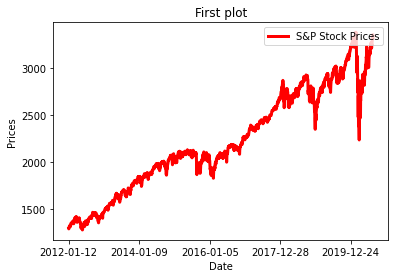

In [5]:
stock_df.plot(x = 'Date', y = 'sp500', label = 'S&P Stock Prices', linewidth = 3, color = "red")
plt.ylabel("Prices")
plt.legend(loc = "upper right")
plt.title("First plot")

Text(0.5, 0, 'AAPL Returns')

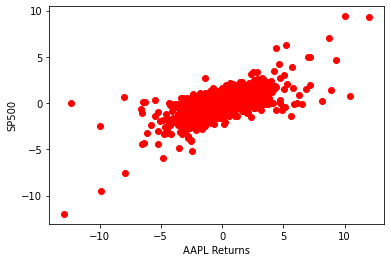

In [3]:
daily_return_df = pd.read_csv("daily_returns.csv")

x = daily_return_df["AAPL"]
y = daily_return_df["sp500"]

plt.scatter(x, y, color='red')
plt.ylabel("SP500")
plt.xlabel("AAPL Returns")

Text(0.5, 1.0, 'Portfolio Allocation')

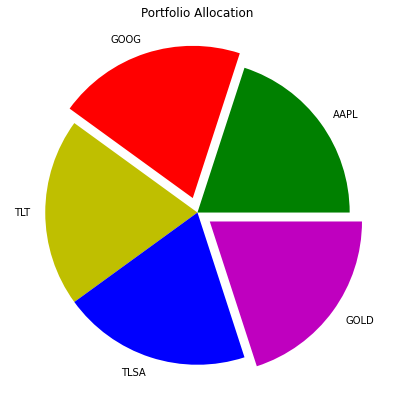

In [14]:
values = [20,20,20,20,20]
colors = ['g', 'r', 'y', 'b','m']
labels = ['AAPL', 'GOOG','TLT','TLSA','GOLD']
explode = [0, 0.1, 0, 0, 0.1]

plt.figure(figsize=(7,7))
plt.pie(values, colors=colors, labels = labels, explode = explode);
plt.title("Portfolio Allocation")

In [15]:
mu = daily_return_df['AAPL'].mean()
sigma = daily_return_df['AAPL'].std()

Text(0.5, 1.0, 'Histogram: mu = 0.11\nSigma: 1.776')

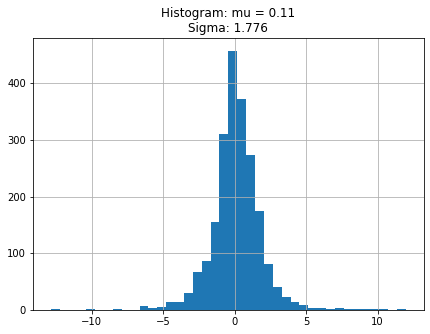

In [26]:
num_bins=40

plt.figure(figsize=(7,5))
plt.hist(daily_return_df['AAPL'], num_bins);
plt.grid()
plt.title("Histogram: mu = %.2f" % mu + "\nSigma: %.3f" % sigma)

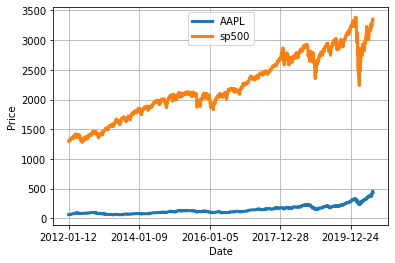

In [31]:
stock_df.plot(x = "Date", y = ['AAPL','sp500'], linewidth = 3)
plt.ylabel('Price')
plt.grid()
plt.legend(loc = "upper center")

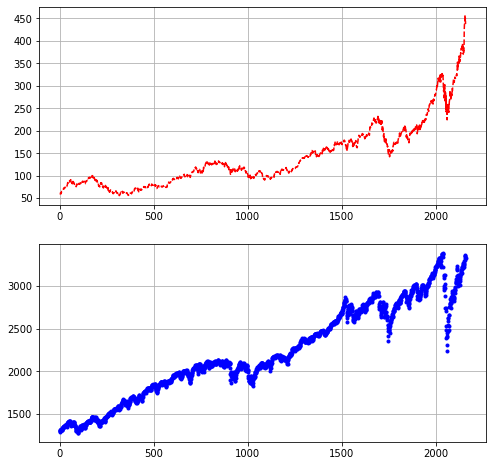

In [39]:
plt.figure(figsize= (8,8))
plt.subplot(2,1,1)
plt.plot(stock_df['AAPL'], "r--")
plt.grid()

plt.subplot(2,1,2)
plt.plot(stock_df['sp500'], "b.")
plt.grid()

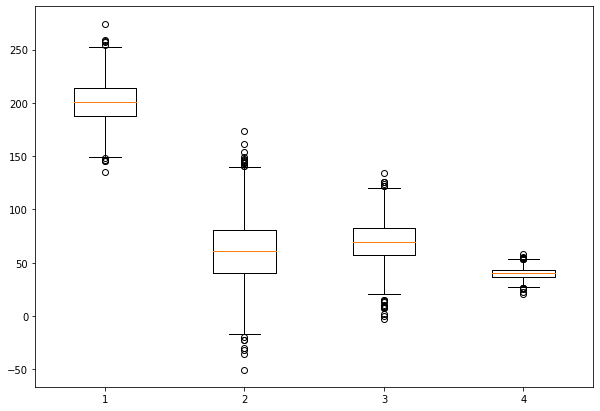

In [42]:
data_1 = np.random.normal(200, 20, 2000)
data_2 = np.random.normal(60, 30, 2000)
data_3 = np.random.normal(70,20,2000)
data_4 = np.random.normal(40,5,2000)

data = [data_1,data_2,data_3,data_4]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)

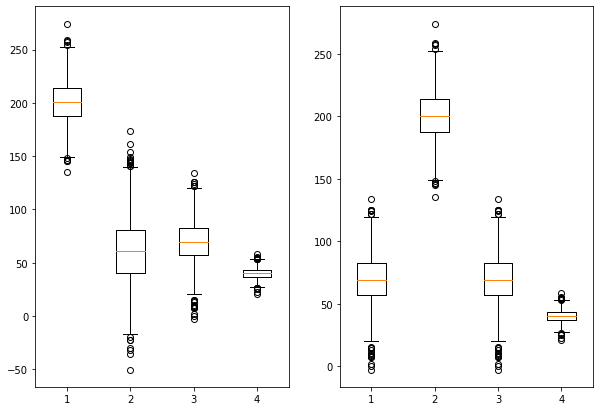

In [60]:
data2 = [data_3,data_1,data_3,data_4]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
bp = ax.boxplot(data)
ax2 = fig.add_subplot(122)
bp2 = ax2.boxplot(data2)

In [64]:
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import plotly.figure_factory as ff 
import plotly.graph_objects as go 

In [66]:
stocks_df = pd.read_csv("stocks.csv")
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [67]:
stock_df = stock_df.sort_values(by = ['Date'])

In [68]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [72]:
def interactive_plot(df,title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [73]:
interactive_plot(stock_df,'Prices')

In [74]:
interactive_plot(normalize(stock_df),'Normalised Prices')

In [75]:
np.random.seed(101)

weights = np.array(np.random.random(9))
weights = weights / np.sum(weights)

In [93]:
df_portfolio = normalize(stock_df)

for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

df_portfolio['portfolio daily worth ($)'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio['pct daily return'] = 0.0000

for i in range(1, len(stock_df)):
    df_portfolio['pct daily return'][i] = ((df_portfolio['portfolio daily worth ($)'][i] - df_portfolio['portfolio daily worth ($)'][i-1]) / df_portfolio['portfolio daily worth ($)'][i-1]) * 100

In [94]:
df_portfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth ($)  pct daily return  
0                  1.000000e+06          0.000000  
1                  9.847792e+05         -1.522076  
2                  1.000669e+06          1.613507  
3                  1.013905e+06          1.322705  
4                  1.020814e+06          0.681427  
...                         ...               ...  
2154               8.588634e+06          0.879605  
2155               8.664444e+06          0.882669  
2156               8.506059e+06         -1.827981  
2157               8.450456e+06         -0.653686  
2158               8.256690e+06         -2.292973  

[2159 rows x 12 columns]

In [96]:
fig = px.line(x = df_portfolio['Date'], y = df_portfolio['pct daily return'], title = "Portfolio Daily Returns")
fig.show()

In [98]:
interactive_plot(df_portfolio.drop(['portfolio daily worth ($)', 'pct daily return'], axis = 1), title = "Indv Portfolio")